In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from google.colab import output
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from IPython.display import display
import warnings
warnings.filterwarnings(action="ignore")
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 1차 클러스터링

In [ ]:
df=pd.read_csv('/content/drive/Shareddrives/빅콘테스트/데이터/loan_result_train.csv')

In [ ]:
df.columns

Index(['application_id', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied'],
      dtype='object')

In [ ]:
df.isna().sum()

application_id              0
loanapply_insert_time       0
bank_id                     0
product_id                  0
loan_limit               5738
loan_rate                5738
is_applied                  0
dtype: int64

In [ ]:
df.bank_id.unique()

array([54, 11, 42, 25, 22, 44,  6, 52, 41, 30, 38, 24, 58, 34, 51,  5, 31,
       50, 32, 23, 19, 63, 62, 47, 21, 28,  1, 17, 33,  3, 49, 13, 59, 36,
       12, 27, 64, 61,  8, 14, 40, 35, 45, 43, 37, 60, 10,  4, 57, 29, 15,
       46, 18,  7, 55, 20, 26, 39,  2,  9, 56, 16])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

application_id           0
loanapply_insert_time    0
bank_id                  0
product_id               0
loan_limit               0
loan_rate                0
is_applied               0
dtype: int64

In [ ]:
df1 = df.groupby(['bank_id','product_id']).agg({'loan_limit':'max', 'loan_rate':'mean','is_applied':'mean'}).reset_index()

In [ ]:
df1.shape

(168, 5)

In [ ]:
df1.head()

,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1,1,150000000.0,10.496421,0.055573
1,1,61,150000000.0,12.460397,0.071104
2,2,7,60000000.0,13.884407,0.093935
3,2,93,50000000.0,16.823364,0.280374
4,2,126,55000000.0,18.072819,0.389262


In [ ]:
data=df1[['loan_limit','loan_rate','is_applied']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(data)
scaled = pd.DataFrame(scaled, columns = data.columns)
scaled.describe()

,loan_limit,loan_rate,is_applied
count,1.680000e+02,1.680000e+02,1.680000e+02
mean,1.586033e-17,1.797504e-16,7.930164e-18
std,1.002990e+00,1.002990e+00,1.002990e+00
min,-1.777344e-01,-2.446698e+00,-5.624793e-01
25%,-1.385146e-01,-6.014113e-01,-4.313262e-01
50%,-1.146000e-01,1.778603e-01,-2.609315e-01
75%,-5.401650e-02,6.800250e-01,-3.910100e-02
max,1.257286e+01,2.094402e+00,6.346755e+00


In [ ]:
df = scaled.copy()

In [ ]:
df.head()

,loan_limit,loan_rate,is_applied
0,0.009756,-0.565001,-0.178514
1,0.009756,0.000146,-0.071208
2,-0.105034,0.409914,0.086538
3,-0.117789,1.255618,1.374689
4,-0.111411,1.615156,2.127021


In [ ]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples

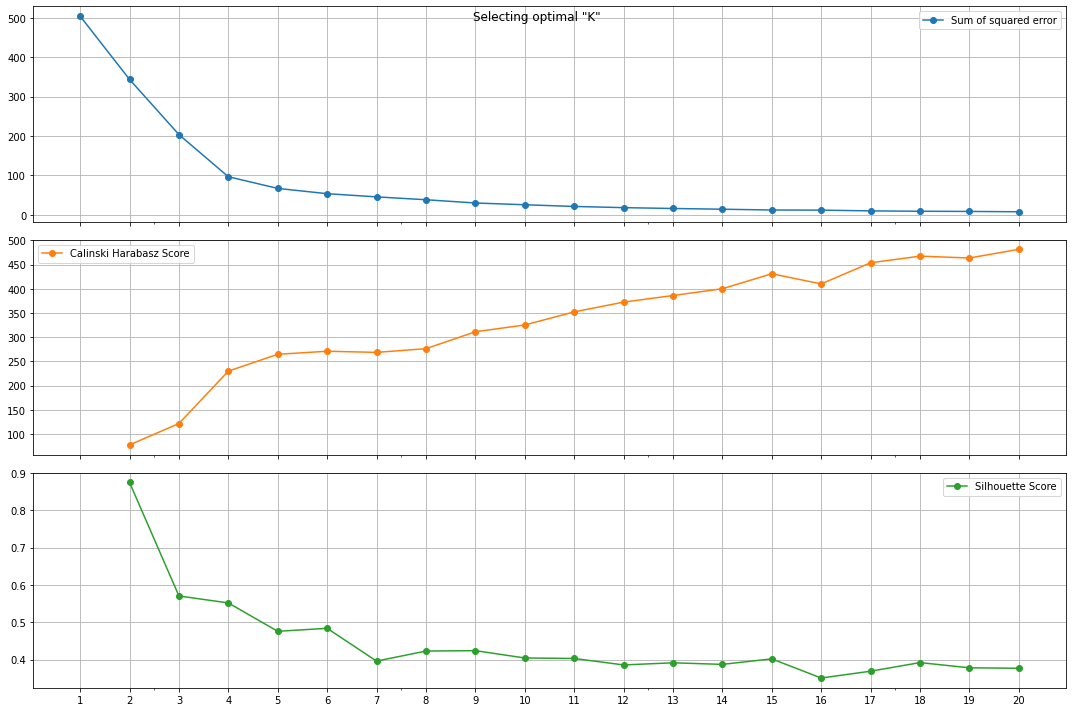

In [ ]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(df)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(df)
        chs = calinski_harabasz_score(df, cluster)
        ss = silhouette_score(df, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

## k=2

In [ ]:
df = scaled.copy()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=2, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.875


In [ ]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.880525
1    0.000000
Name: k_silhouette_coeff, dtype: float64

In [ ]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


## EDA/Interpretation

In [ ]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,-0.075287,0.006819,0.000532,0.880525
1,12.572863,-1.138712,-0.088887,0.000000


In [ ]:
df.groupby('k_means_cluster').std()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,0.232542,1.002093,1.005982,0.061065
1,NaN,NaN,NaN,NaN


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
palette = sns.color_palette("bright", 10)

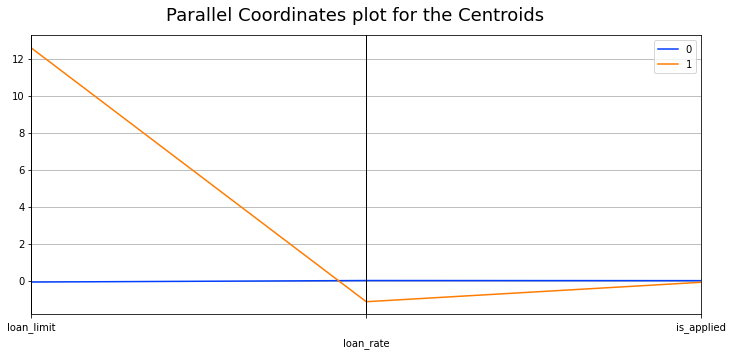

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [ ]:
df['k_means_cluster'].unique()

array([0, 1], dtype=int32)

## k = 3

In [ ]:
df = scaled.copy()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=3, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.612


In [ ]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.703869
1    0.343097
2    0.000000
Name: k_silhouette_coeff, dtype: float64

In [ ]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


## EDA/Interpretation

In [ ]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,-0.091774,0.465518,-0.248469,0.703869
1,-0.024619,-1.402843,0.765755,0.343097
2,12.572863,-1.138712,-0.088887,0.000000


In [ ]:
df.groupby('k_means_cluster').std()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,0.051501,0.609427,0.339722,0.099994
1,0.461127,0.554219,1.744601,0.135840
2,NaN,NaN,NaN,NaN


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
palette = sns.color_palette("bright", 10)

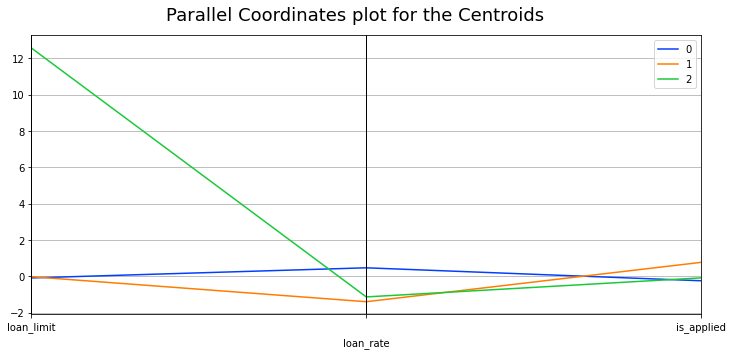

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [ ]:
df['k_means_cluster'].unique()

array([0, 1, 2], dtype=int32)

In [ ]:
f= pd.concat([df1[['bank_id','product_id']],df],axis=1)

In [ ]:
f.to_csv('/content/drive/Shareddrives/빅콘테스트/슬빈/bankclustering.csv',index=False)

In [ ]:
f.shape

(168, 7)

## k=4

In [ ]:
df4 = scaled.copy()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=312, algorithm='auto')
model.fit(df4)

KMeans(n_clusters=4, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(df4)
pred

array([2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df4.columns)

In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df4['k_means_cluster'] = pred
df4['k_silhouette_coeff'] = silhouette_samples(df4, df4['k_means_cluster'])

k_average_score = silhouette_score(df4, df4['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.698


In [ ]:
# 군집별 평균 silhouette_score 값
df4.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.738870
1    0.458084
2    0.647279
3    0.000000
Name: k_silhouette_coeff, dtype: float64

In [ ]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


## EDA/Interpretation

In [ ]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,-0.094442,0.561517,-0.246624,0.738870
1,-0.111624,-0.926155,4.571903,0.458084
2,-0.022657,-1.258234,0.022157,0.647279
3,12.572863,-1.138712,-0.088887,0.000000


In [ ]:
df.groupby('k_means_cluster').std()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,0.049321,0.547422,0.346701,0.071599
1,0.048079,1.006364,1.504449,0.226182
2,0.434873,0.542541,0.483994,0.105803
3,NaN,NaN,NaN,NaN


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
palette = sns.color_palette("bright", 10)

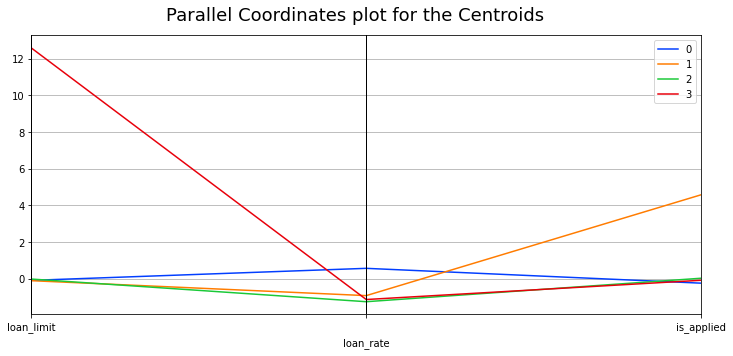

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [ ]:
df['k_means_cluster'].unique()

array([2, 0, 1, 3], dtype=int32)

In [ ]:
f= pd.concat([df1[['bank_id','product_id']],df],axis=1)

In [ ]:
f.to_csv('/content/drive/Shareddrives/빅콘테스트/슬빈/bankclustering.csv',index=False)

In [ ]:
f.shape

(168, 7)

KeyError: ignored

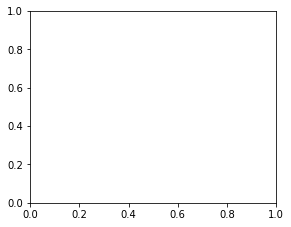

In [ ]:
# 시각화방법 1
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,12)) 
plt.subplot(3,3,1) 
sns.distplot(df[df.k_means_cluster == 0]["minInformation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minInformation"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,2) 
sns.distplot(df[df.k_means_cluster == 0]["minTouristSpot"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minTouristSpot"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,3)
sns.distplot(df[df.k_means_cluster == 0]["restaurant"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["restaurant"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,4)
sns.distplot(df[df.k_means_cluster == 0]["park"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["park"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,5)
sns.distplot(df[df.k_means_cluster == 0]["shop"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["shop"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,6)
sns.distplot(df[df.k_means_cluster == 0]["pedestrian"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["pedestrian"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,7)
sns.distplot(df[df.k_means_cluster == 0]["accommodation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["accommodation"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,8)
sns.distplot(df[df.k_means_cluster == 0]["filmNum"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["filmNum"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.show()

In [ ]:
# 시각화방법 2
df.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

# 이상치 제외하고 다시 클러스터링

In [ ]:
df4[df4['k_means_cluster']==3]

,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
119,12.572863,-1.138712,-0.088887,3,0.0


In [ ]:
df119 = pd.DataFrame(df4, index=[119])

In [ ]:
df119.head()

,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
119,12.572863,-1.138712,-0.088887,3,0.0


In [ ]:
df119_2 = pd.DataFrame(df1, index=[119])

In [ ]:
df119_2 

,bank_id,product_id,loan_limit,loan_rate,is_applied
119,43,246,1.000000e+10,8.502684,0.068545


## k =3 (최종 클러스터링 방법론)

In [ ]:
df = scaled.copy()

In [ ]:
df = df.drop(index=[119], axis=0)

In [ ]:
df.shape

(167, 3)

In [ ]:
df.head()

,loan_limit,loan_rate,is_applied
0,0.009756,-0.565001,-0.178514
1,0.009756,0.000146,-0.071208
2,-0.105034,0.409914,0.086538
3,-0.117789,1.255618,1.374689
4,-0.111411,1.615156,2.127021


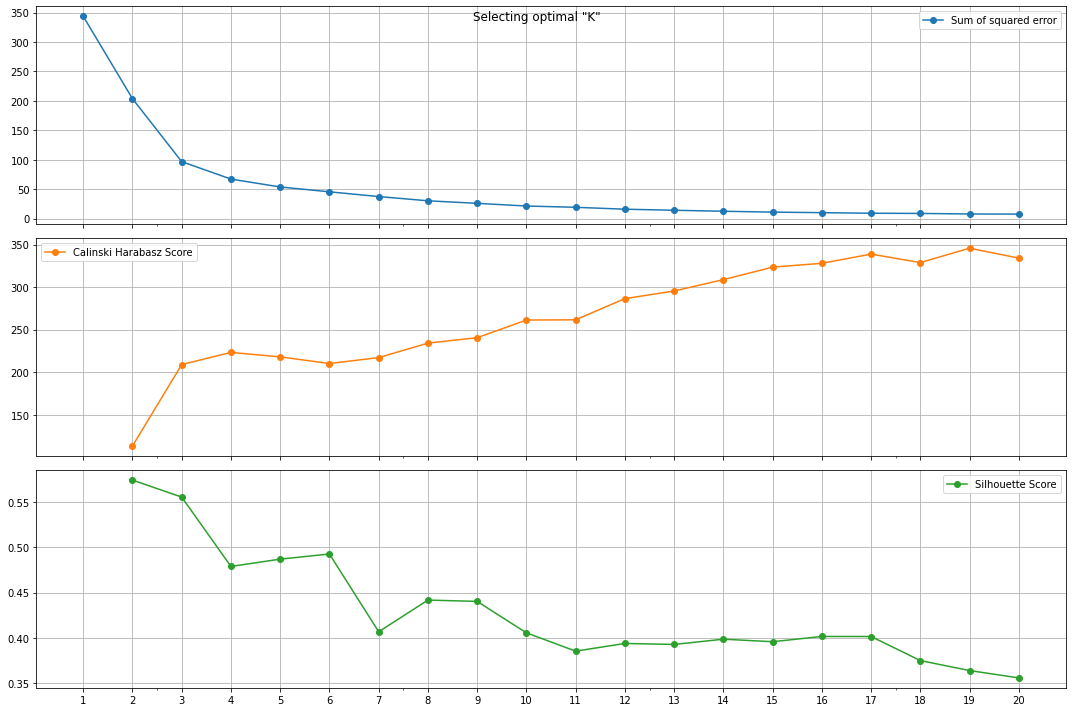

In [ ]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(df)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(df)
        chs = calinski_harabasz_score(df, cluster)
        ss = silhouette_score(df, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=3, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.702


In [ ]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.738870
1    0.458084
2    0.647279
Name: k_silhouette_coeff, dtype: float64

In [ ]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


In [ ]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,-0.094442,0.561517,-0.246624,0.738870
1,-0.111624,-0.926155,4.571903,0.458084
2,-0.022657,-1.258234,0.022157,0.647279


In [ ]:
df.groupby('k_means_cluster').std()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,0.049321,0.547422,0.346701,0.071599
1,0.048079,1.006364,1.504449,0.226182
2,0.434873,0.542541,0.483994,0.105803


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
palette = sns.color_palette("bright", 10)

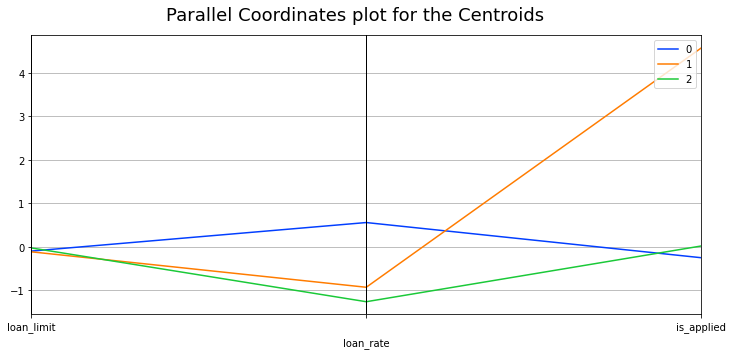

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [ ]:
df['k_means_cluster'].unique()

array([2, 0, 1], dtype=int32)

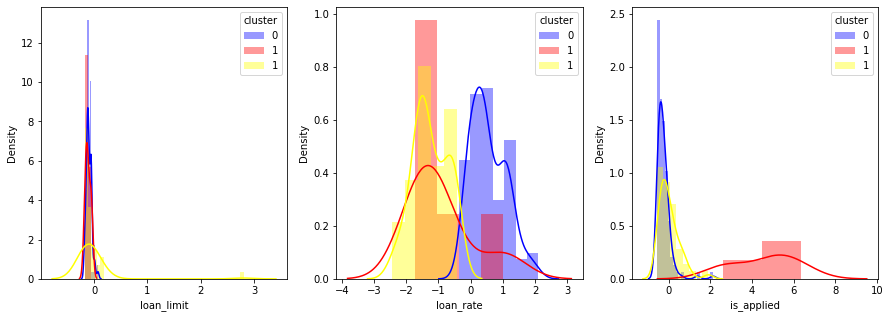

In [ ]:
# 시각화방법 1
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,5)) 
plt.subplot(1,3,1) 
sns.distplot(df[df.k_means_cluster == 0]["loan_limit"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["loan_limit"], 
             color="red", label=1)
sns.distplot(df[df.k_means_cluster == 2]["loan_limit"], 
             color="yellow", label=1)
plt.legend(title="cluster")


plt.subplot(1,3,2) 
sns.distplot(df[df.k_means_cluster == 0]["loan_rate"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["loan_rate"], 
             color="red", label=1)
sns.distplot(df[df.k_means_cluster == 2]["loan_rate"], 
             color="yellow", label=1)
plt.legend(title="cluster")


plt.subplot(1,3,3)
sns.distplot(df[df.k_means_cluster == 0]["is_applied"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["is_applied"], 
             color="red", label=1)
sns.distplot(df[df.k_means_cluster == 2]["is_applied"], 
             color="yellow", label=1)
plt.legend(title="cluster")


plt.show()

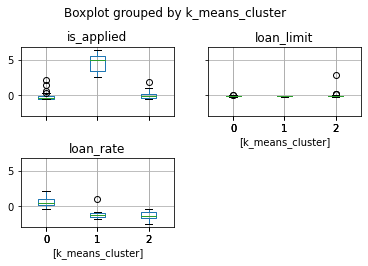

In [ ]:
# 시각화방법 2
df.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

## 저장

In [ ]:
df1.head()

,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1,1,150000000.0,10.496421,0.055573
1,1,61,150000000.0,12.460397,0.071104
2,2,7,60000000.0,13.884407,0.093935
3,2,93,50000000.0,16.823364,0.280374
4,2,126,55000000.0,18.072819,0.389262


In [ ]:
df1.tail()

,bank_id,product_id,loan_limit,loan_rate,is_applied
163,62,200,50000000.0,11.031414,0.116528
164,63,184,20000000.0,6.919068,0.114997
165,63,226,100000000.0,14.502109,0.043258
166,64,245,50000000.0,12.569138,0.083710
167,64,254,50000000.0,11.227194,0.040040


In [ ]:
df1.head()

,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1,1,150000000.0,10.496421,0.055573
1,1,61,150000000.0,12.460397,0.071104
2,2,7,60000000.0,13.884407,0.093935
3,2,93,50000000.0,16.823364,0.280374
4,2,126,55000000.0,18.072819,0.389262


In [ ]:
df.tail()

,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
163,-0.117789,-0.411053,0.242638,2,0.526174
164,-0.156052,-1.594408,0.232060,2,0.731894
165,-0.054017,0.587662,-0.263600,0,0.807277
166,-0.117789,0.031437,0.015893,0,0.698299
167,-0.117789,-0.354716,-0.285835,0,0.584965


In [ ]:
df.head()

,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
0,0.009756,-0.565001,-0.178514,2,0.594688
1,0.009756,0.000146,-0.071208,0,0.702186
2,-0.105034,0.409914,0.086538,0,0.753633
3,-0.117789,1.255618,1.374689,0,0.477552
4,-0.111411,1.615156,2.127021,0,0.322750


In [ ]:
df1 = df1.drop(index=[119],axis=0)

In [ ]:
df1.reset_index(inplace=True)
df.reset_index(inplace=True)

In [ ]:
df1.tail()

,index,bank_id,product_id,loan_limit,loan_rate,is_applied
162,163,62,200,50000000.0,11.031414,0.116528
163,164,63,184,20000000.0,6.919068,0.114997
164,165,63,226,100000000.0,14.502109,0.043258
165,166,64,245,50000000.0,12.569138,0.083710
166,167,64,254,50000000.0,11.227194,0.040040


In [ ]:
df.tail()

,index,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
162,163,-0.117789,-0.411053,0.242638,2,0.526174
163,164,-0.156052,-1.594408,0.232060,2,0.731894
164,165,-0.054017,0.587662,-0.263600,0,0.807277
165,166,-0.117789,0.031437,0.015893,0,0.698299
166,167,-0.117789,-0.354716,-0.285835,0,0.584965


In [ ]:
f= pd.concat([df1[['bank_id','product_id']],df],axis=1)

In [ ]:
f.drop(columns=['index'],inplace=True)

In [ ]:
f119= pd.concat([df119_2[['bank_id','product_id']],df119],axis=1)

In [ ]:
f.head()

,bank_id,product_id,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
0,1,1,0.009756,-0.565001,-0.178514,2,0.594688
1,1,61,0.009756,0.000146,-0.071208,0,0.702186
2,2,7,-0.105034,0.409914,0.086538,0,0.753633
3,2,93,-0.117789,1.255618,1.374689,0,0.477552
4,2,126,-0.111411,1.615156,2.127021,0,0.322750


In [ ]:
f['k_means_cluster'].unique()

array([2, 0, 1], dtype=int32)

In [ ]:
f119

,bank_id,product_id,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
119,43,246,12.572863,-1.138712,-0.088887,3,0.0


In [ ]:
ff= pd.concat([f,f119],axis=0)

In [ ]:
ff.tail()

,bank_id,product_id,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
163,63,184,-0.156052,-1.594408,0.232060,2,0.731894
164,63,226,-0.054017,0.587662,-0.263600,0,0.807277
165,64,245,-0.117789,0.031437,0.015893,0,0.698299
166,64,254,-0.117789,-0.354716,-0.285835,0,0.584965
119,43,246,12.572863,-1.138712,-0.088887,3,0.000000


In [ ]:
ff.reset_index(inplace=True,drop=True)

In [ ]:
ff.tail()

,bank_id,product_id,loan_limit,loan_rate,is_applied,k_means_cluster,k_silhouette_coeff
163,63,184,-0.156052,-1.594408,0.232060,2,0.731894
164,63,226,-0.054017,0.587662,-0.263600,0,0.807277
165,64,245,-0.117789,0.031437,0.015893,0,0.698299
166,64,254,-0.117789,-0.354716,-0.285835,0,0.584965
167,43,246,12.572863,-1.138712,-0.088887,3,0.000000


In [ ]:
ff.shape

(168, 7)

In [ ]:
ff.to_csv('/content/drive/Shareddrives/빅콘테스트/슬빈/bankclustering.csv',index=False)

## k =2

In [ ]:
df = scaled.copy()

In [ ]:
df = df.drop(index=[119], axis=0)

In [ ]:
df.shape

(167, 3)

In [ ]:
df.head()

,loan_limit,loan_rate,is_applied
0,0.009756,-0.565001,-0.178514
1,0.009756,0.000146,-0.071208
2,-0.105034,0.409914,0.086538
3,-0.117789,1.255618,1.374689
4,-0.111411,1.615156,2.127021


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=2, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.616


In [ ]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.703869
1    0.343097
Name: k_silhouette_coeff, dtype: float64

In [ ]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


In [ ]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,-0.091774,0.465518,-0.248469,0.703869
1,-0.024619,-1.402843,0.765755,0.343097


In [ ]:
df.groupby('k_means_cluster').std()

,loan_limit,loan_rate,is_applied,k_silhouette_coeff
k_means_cluster,,,,
0,0.051501,0.609427,0.339722,0.099994
1,0.461127,0.554219,1.744601,0.135840


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
palette = sns.color_palette("bright", 10)

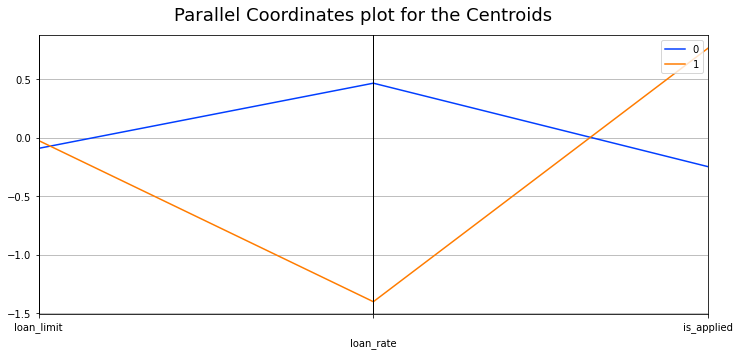

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [ ]:
df['k_means_cluster'].unique()

array([2, 0, 1], dtype=int32)

KeyError: ignored

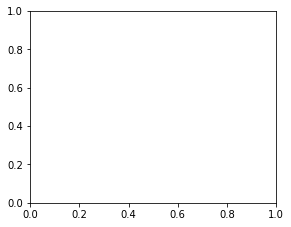

In [ ]:
# 시각화방법 1
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,12)) 
plt.subplot(3,3,1) 
sns.distplot(df[df.k_means_cluster == 0]["minInformation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minInformation"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,2) 
sns.distplot(df[df.k_means_cluster == 0]["minTouristSpot"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minTouristSpot"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,3)
sns.distplot(df[df.k_means_cluster == 0]["restaurant"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["restaurant"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,4)
sns.distplot(df[df.k_means_cluster == 0]["park"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["park"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,5)
sns.distplot(df[df.k_means_cluster == 0]["shop"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["shop"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,6)
sns.distplot(df[df.k_means_cluster == 0]["pedestrian"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["pedestrian"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,7)
sns.distplot(df[df.k_means_cluster == 0]["accommodation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["accommodation"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,8)
sns.distplot(df[df.k_means_cluster == 0]["filmNum"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["filmNum"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.show()

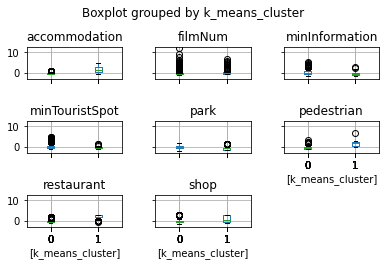

In [ ]:
# 시각화방법 2
df.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()